In [1]:
# Importing the required libraries for analysis
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the properties, train and sample submission dataset
zillow_properties_data = pd.read_csv("properties_2016.csv", low_memory=False)
zillow_properties_data.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [3]:
zillow_properties_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
parcelid,2985217.0,1.332586e+07,7.909966e+06,1.071172e+07,1.164371e+07,1.254509e+07,1.409712e+07,1.696019e+08
airconditioningtypeid,811519.0,1.931166e+00,3.148587e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,6061.0,7.202607e+00,2.436290e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.700000e+01
basementsqft,1628.0,6.468833e+02,5.387935e+02,2.000000e+01,2.720000e+02,5.340000e+02,8.472500e+02,8.516000e+03
bathroomcnt,2973755.0,2.209143e+00,1.077754e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
bedroomcnt,2973767.0,3.088949e+00,1.275859e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,2.000000e+01
buildingclasstypeid,12629.0,3.725948e+00,5.017002e-01,1.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00
buildingqualitytypeid,1938488.0,5.784787e+00,1.805352e+00,1.000000e+00,4.000000e+00,7.000000e+00,7.000000e+00,1.200000e+01
calculatedbathnbr,2856305.0,2.299263e+00,1.000736e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
decktypeid,17096.0,6.600000e+01,0.000000e+00,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01


In [4]:
# HW2 Question 1: 
# Do a pairwise Pearson correlation analysis on all interesting pairs of variables. 
# Show the result with heat map and find out most positive and negative correlations.

# Selecting the variables
zillow_data_correlation_variables = ["bedroomcnt", "regionidzip", "taxamount", "calculatedfinishedsquarefeet", "yearbuilt", "lotsizesquarefeet", "bathroomcnt", "heatingorsystemtypeid", "unitcnt"]

zillow_correlation_dataset = zillow_properties_data[zillow_data_correlation_variables]
# Delete the rows having NaN values
zillow_correlation_dataset = zillow_correlation_dataset.dropna()
zillow_correlation_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,1714408.0,3.061689,0.980831,0.00,2.0,3.00,4.0,20.00
regionidzip,1714408.0,96392.821681,4642.056876,95982.00,96124.0,96273.00,96426.0,399675.00
taxamount,1714408.0,5355.190392,7681.884832,38.88,2452.5,3893.23,6041.9,1078101.87
calculatedfinishedsquarefeet,1714408.0,1711.564891,916.359923,1.00,1164.0,1493.00,1984.0,55732.00
yearbuilt,1714408.0,1960.496144,22.501451,1801.00,1948.0,1956.00,1978.0,2015.00
lotsizesquarefeet,1714408.0,28509.696115,103283.726136,144.00,5864.0,7296.00,11935.0,26166748.00
bathroomcnt,1714408.0,2.195669,0.988838,0.00,2.0,2.00,3.0,20.00
heatingorsystemtypeid,1714408.0,3.741099,2.445411,2.00,2.0,2.00,7.0,20.00
unitcnt,1714408.0,1.002461,0.186295,1.00,1.0,1.00,1.0,143.00


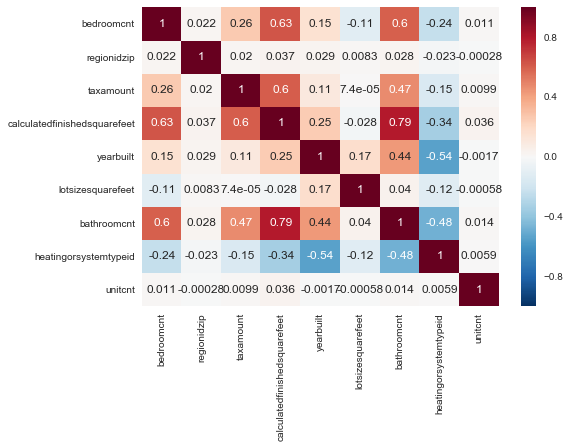

In [5]:
sns.set()
# Performing pair wise correlation on the selected list of attributes
zillow_correlation = zillow_correlation_dataset.corr()
sns.heatmap(zillow_correlation, annot=True)
plt.show()

In [6]:
# HW2 Answer 1
# calculatedfinishedsquarefeet and bathroomcnt have the strongest correlation (0.79)
# as area of the house increases with the number of bathrooms present in it.
# heatingorsystemtypeid and yearbuilt have the weakest correlation (-0.54)
# because heating mechanisms like wood burning/suspended/vents/radiants (which have larger id values)
# are associated with old houses (1900s) while modern heating mechanisms like
# central/convection/electric (lesser id values) will be present in the new houses.

In [7]:
# Creating the training and testing datasets
zillow_train_data = pd.read_csv("train_2016_v2.csv", low_memory=False, parse_dates=["transactiondate"]) 
zillow_test_data = pd.read_csv("sample_submission.csv", low_memory=False)
zillow_test_data = zillow_test_data.rename(columns={'ParcelId': 'parcelid'})

# Merging the properties dataset with the train and test data
zillow_train_data = zillow_train_data.merge(zillow_properties_data, how='left', on='parcelid') 
zillow_test_data = zillow_test_data.merge(zillow_properties_data, how='left', on='parcelid') 

In [8]:
#Analysing statistics of each attribute in the dataset
zillow_train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
parcelid,90275.0,1.298466e+07,2.504510e+06,1.071174e+07,1.155950e+07,1.254734e+07,1.422755e+07,1.629608e+08
logerror,90275.0,1.145722e-02,1.610788e-01,-4.605000e+00,-2.530000e-02,6.000000e-03,3.920000e-02,4.737000e+00
airconditioningtypeid,28781.0,1.816372e+00,2.974168e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,261.0,7.229885e+00,2.716196e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,43.0,7.135814e+02,4.374342e+02,1.000000e+02,4.075000e+02,6.160000e+02,8.720000e+02,1.555000e+03
bathroomcnt,90275.0,2.279474e+00,1.004271e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
bedroomcnt,90275.0,3.031869e+00,1.156436e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
buildingclasstypeid,16.0,4.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
buildingqualitytypeid,57364.0,5.565407e+00,1.900602e+00,1.000000e+00,4.000000e+00,7.000000e+00,7.000000e+00,1.200000e+01
calculatedbathnbr,89093.0,2.309216e+00,9.761725e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01


In [9]:
zillow_test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
parcelid,2985217.0,1.332586e+07,7.909966e+06,1.071172e+07,1.164371e+07,1.254509e+07,1.409712e+07,1.696019e+08
201610,2985217.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
201611,2985217.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
201612,2985217.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
201710,2985217.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
201711,2985217.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
201712,2985217.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
airconditioningtypeid,811519.0,1.931166e+00,3.148587e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,6061.0,7.202607e+00,2.436290e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.700000e+01
basementsqft,1628.0,6.468833e+02,5.387935e+02,2.000000e+01,2.720000e+02,5.340000e+02,8.472500e+02,8.516000e+03


In [10]:
zillow_train_data.shape

(90275, 60)

In [11]:
zillow_test_data.shape

(2985217, 64)

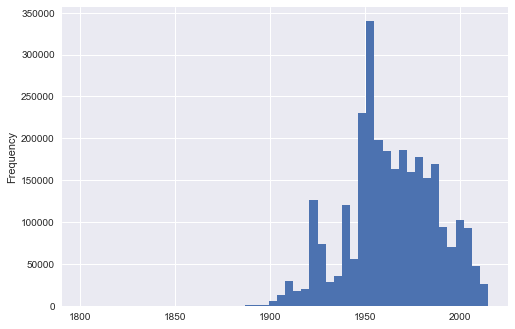

In [12]:
# HW2 Question 2:
# Produce five other informative plots revealing aspects of this data. For each plot, write a paragraph in your notebook describing what interesting properties your visualization reveals. These must include:
# at least one line chart
# at least one scatter plot or data map
# at least one histogram or bar chart 

# HW2 Answer 2:
zillow_properties_data["yearbuilt"].plot.hist(bins=50)
plt.show()

In [13]:
# Most of the houses have been built in 1950 to 2000 timeframe. 
# We can observe a steady increase in the number of houses till 1930s (might indicate post WW1)
# And a decrease till 1950s (probably WW2 effect)
# The decrease in houses from 1960s to 2016 might be due to lack of free space
# to construct houses as most of it is already taken. It can also indicate cities expanding
# leaving little independent homes.

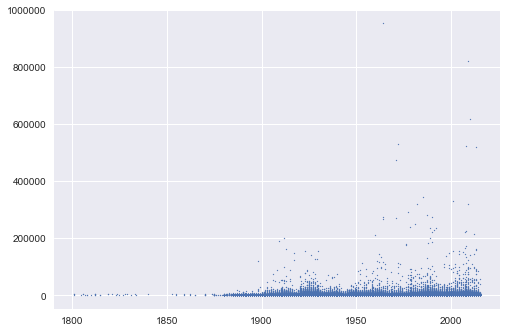

In [14]:
plt.scatter(zillow_properties_data["yearbuilt"], zillow_properties_data["calculatedfinishedsquarefeet"], s=1)
plt.show()

In [15]:
# Observing the scatter plot of the year the houses were built and the dimensions of them
# we can conclude that most of the medium size homes were built in early 2000s (increase in population)
# The bigger ones like mansions were built in 1970s to 1990s, while there are few outliers 
# in 2010s. The average size and density of houses is steadily increasing from 1900s to 2000s. 
# There are few old small houses built in 1800s (lesser population)

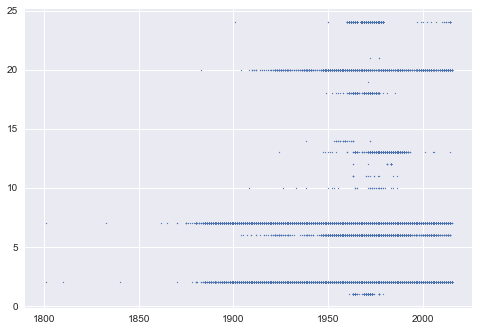

In [16]:
plt.scatter(zillow_properties_data["yearbuilt"], zillow_properties_data["heatingorsystemtypeid"], s=1)
#zillow_properties_data["heatingorsystemtypeid"].plot.hist(bins=100)
plt.show()

In [17]:
# Observing the histogram of the heating system types
# "Coal" and "Wall" based heating system is most common and widely used since 1900s
# "Solar" heating system gained popularity in 1940s and similarly "Forced air"
# mechanism is in use since 1950s. These patterns indicate advancement of technology 
# during 1940-1950 time frame (most likely due to WW2).

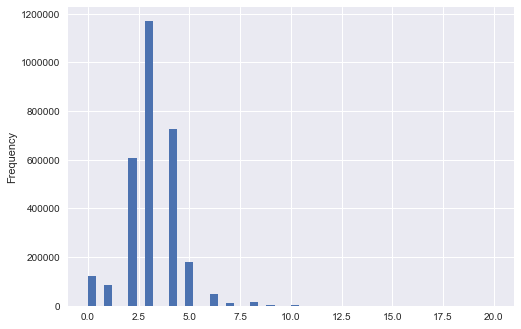

In [18]:
zillow_properties_data["bedroomcnt"].plot.hist(bins=50)
plt.show()

In [19]:
# The average & median number of bedroom is around 3, while the max is more than 10. (outlier)
# This suggests that the average size of the houses is between small to medium.

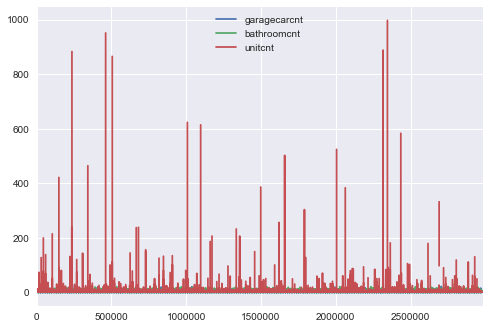

In [20]:
zillow_properties_data[["garagecarcnt","bathroomcnt","unitcnt"]].plot.line()
plt.show()

In [21]:
# The plot between the numberofstories, unitcnt and bathroomcnt 
# The overlap of bathroom count over number of stories indicates the 
# type of houses having multiple units (like duplex, triplex) are likely
# to have garage places as well.

In [22]:
# Feature Selection/Removal
# Creating a threshold to remove attributes that are sparse in data
# and removing them from the dataset

threshold = 0.30
zillow_data_feature_removal = zillow_train_data.copy()
for attr in zillow_train_data.columns.values.tolist():
    if zillow_train_data[attr].isnull().sum()/float(zillow_train_data.shape[0]) > threshold:
        del zillow_data_feature_removal[attr]

zillow_data_feature_removal.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
parcelid,90275.0,1.298466e+07,2.504510e+06,1.071174e+07,1.155950e+07,1.254734e+07,1.422755e+07,1.629608e+08
logerror,90275.0,1.145722e-02,1.610788e-01,-4.605000e+00,-2.530000e-02,6.000000e-03,3.920000e-02,4.737000e+00
bathroomcnt,90275.0,2.279474e+00,1.004271e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
bedroomcnt,90275.0,3.031869e+00,1.156436e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
calculatedbathnbr,89093.0,2.309216e+00,9.761725e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
calculatedfinishedsquarefeet,89614.0,1.773186e+03,9.281624e+02,2.000000e+00,1.184000e+03,1.540000e+03,2.095000e+03,2.274100e+04
finishedsquarefeet12,85596.0,1.745455e+03,9.099412e+02,2.000000e+00,1.172000e+03,1.518000e+03,2.056000e+03,2.001300e+04
fips,90275.0,6.048871e+03,2.066346e+01,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03
fullbathcnt,89093.0,2.241231e+00,9.631416e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
latitude,90275.0,3.400541e+07,2.649654e+05,3.333930e+07,3.381154e+07,3.402150e+07,3.417274e+07,3.481601e+07


In [23]:
# There is not much difference between the attributes lattitude and longitude, 
# and regionidzip, as both of these gives us the same information about the location
# of the parcel. For a given regionidzip, there won't be significant difference 
# in the latitude and logitude values and the house prices
del zillow_data_feature_removal['latitude']
del zillow_data_feature_removal['longitude']


# regionidcounty and regionidcity can be figured out with regionidzip
# City and county combination can be figured out with the zipcode of the parcel
# So we can remove both from our dataset
del zillow_data_feature_removal['regionidcounty']
del zillow_data_feature_removal['regionidcity']


# taxvaluedollarcnt = structuretaxvaluedollarcnt + landtaxvaluedollarcnt
# This redundant data can be removed from the dataset
del zillow_data_feature_removal['structuretaxvaluedollarcnt']
del zillow_data_feature_removal['landtaxvaluedollarcnt']


# fips Federal Information Processing Standard code is the same for most of the data
del zillow_data_feature_removal['fips']


# bathroomcnt is the same as calculatedbathnbr and fullbathcnt, Hence we retain bathroomcnt and delete the other 2 
del zillow_data_feature_removal['calculatedbathnbr']
del zillow_data_feature_removal['fullbathcnt']


# calculatedfinishedsquarefeet and finishedsquarefeet12 are similar, 
# and calcuatedfinishedsqarefeet might be more accurate and one of them can be removed
del zillow_data_feature_removal['finishedsquarefeet12']


# Removing redundant data censustractandblock (similar to rawcensustractandblock)
# Census data contains information about location i.e. block and district which 
# can be obtained from regionidzip.
del zillow_data_feature_removal['censustractandblock']
del zillow_data_feature_removal['rawcensustractandblock']


# Removing propertycountylandusecode as the categorical attribute propertylandusetypeid 
# provides same information
del zillow_data_feature_removal['propertycountylandusecode']

# Removing parcelid as its not required for training the models
del zillow_data_feature_removal['parcelid']

# Spliting transactiondate into transactionyear, transactionmonth, transactionday
zillow_data_feature_removal["transactiondate"] = pd.to_datetime(zillow_data_feature_removal["transactiondate"])
zillow_data_feature_removal["transactionyear"] = zillow_data_feature_removal["transactiondate"].dt.year
zillow_data_feature_removal["transactionmonth"] = zillow_data_feature_removal["transactiondate"].dt.month
zillow_data_feature_removal["transactionday"] = zillow_data_feature_removal["transactiondate"].dt.day
zillow_data_feature_removal.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
logerror,90275.0,0.011457,0.161079,-4.605,-0.0253,0.006,0.0392,4.737000e+00
bathroomcnt,90275.0,2.279474,1.004271,0.000,2.0000,2.000,3.0000,2.000000e+01
bedroomcnt,90275.0,3.031869,1.156436,0.000,2.0000,3.000,4.0000,1.600000e+01
calculatedfinishedsquarefeet,89614.0,1773.185987,928.162393,2.000,1184.0000,1540.000,2095.0000,2.274100e+04
lotsizesquarefeet,80125.0,29110.164177,121721.308654,167.000,5703.0000,7200.000,11686.0000,6.971010e+06
propertylandusetypeid,90275.0,261.832179,5.182901,31.000,261.0000,261.000,266.0000,2.750000e+02
regionidzip,90240.0,96586.131184,3661.339094,95982.000,96193.0000,96393.000,96987.0000,3.996750e+05
roomcnt,90275.0,1.478516,2.819627,0.000,0.0000,0.000,0.0000,1.800000e+01
yearbuilt,89519.0,1968.532870,23.763475,1885.000,1953.0000,1970.000,1987.0000,2.015000e+03
taxvaluedollarcnt,90274.0,457672.627357,554884.398943,22.000,199023.2500,342872.000,540589.0000,2.775000e+07


In [24]:
# Removing all rows with NaN values for easier computation 
# (approach for missing values done later for different analysis)
zillow_data_rows_nan_removed = zillow_data_feature_removal.dropna()
zillow_data_rows_nan_removed.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
logerror,79680.0,0.012006,0.162080,-4.605,-0.0263,0.006,0.0392,4.737000e+00
bathroomcnt,79680.0,2.311339,1.015089,0.000,2.0000,2.000,3.0000,2.000000e+01
bedroomcnt,79680.0,3.139019,1.131215,0.000,2.0000,3.000,4.0000,1.600000e+01
calculatedfinishedsquarefeet,79680.0,1822.305886,952.610981,2.000,1212.0000,1580.000,2169.0000,2.274100e+04
lotsizesquarefeet,79680.0,28833.312445,120533.026676,167.000,5709.0000,7200.000,11679.2500,6.971010e+06
propertylandusetypeid,79680.0,261.345206,5.194099,31.000,261.0000,261.000,261.0000,2.750000e+02
regionidzip,79680.0,96554.167721,3893.393898,95982.000,96185.0000,96375.000,96974.0000,3.996750e+05
roomcnt,79680.0,1.498005,2.879355,0.000,0.0000,0.000,0.0000,1.800000e+01
yearbuilt,79680.0,1965.894917,23.316058,1885.000,1951.0000,1965.000,1984.0000,2.015000e+03
taxvaluedollarcnt,79680.0,465390.710956,577600.757617,1044.000,193977.5000,342872.000,553254.2500,2.775000e+07


In [25]:
# Randomizing the data before the split of train and test data
from sklearn.utils import shuffle
zillow_data_rows_nan_removed = shuffle(zillow_data_rows_nan_removed)

In [26]:
zillow_data_rows_nan_removed.columns

Index(['logerror', 'transactiondate', 'bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'lotsizesquarefeet',
       'propertylandusetypeid', 'regionidzip', 'roomcnt', 'yearbuilt',
       'taxvaluedollarcnt', 'assessmentyear', 'taxamount', 'transactionyear',
       'transactionmonth', 'transactionday'],
      dtype='object')

In [27]:
# Removing transactionyear and transactiondate as the date has been decomposed
# and year is 2016 for all the data points
del zillow_data_rows_nan_removed['transactiondate']
del zillow_data_rows_nan_removed['transactionyear']

# Removing assesmentyear as standard deviation is 0 (its 2016 for all data points)
del zillow_data_rows_nan_removed['assessmentyear']
zillow_data_rows_nan_removed.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
logerror,79680.0,0.012006,0.162080,-4.605,-0.0263,0.006,0.0392,4.737000e+00
bathroomcnt,79680.0,2.311339,1.015089,0.000,2.0000,2.000,3.0000,2.000000e+01
bedroomcnt,79680.0,3.139019,1.131215,0.000,2.0000,3.000,4.0000,1.600000e+01
calculatedfinishedsquarefeet,79680.0,1822.305886,952.610981,2.000,1212.0000,1580.000,2169.0000,2.274100e+04
lotsizesquarefeet,79680.0,28833.312445,120533.026676,167.000,5709.0000,7200.000,11679.2500,6.971010e+06
propertylandusetypeid,79680.0,261.345206,5.194099,31.000,261.0000,261.000,261.0000,2.750000e+02
regionidzip,79680.0,96554.167721,3893.393898,95982.000,96185.0000,96375.000,96974.0000,3.996750e+05
roomcnt,79680.0,1.498005,2.879355,0.000,0.0000,0.000,0.0000,1.800000e+01
yearbuilt,79680.0,1965.894917,23.316058,1885.000,1951.0000,1965.000,1984.0000,2.015000e+03
taxvaluedollarcnt,79680.0,465390.710956,577600.757617,1044.000,193977.5000,342872.000,553254.2500,2.775000e+07


In [28]:
# Converting the data type to float32 from float64 for easier training
zillow_data_train = zillow_data_rows_nan_removed.astype(np.float32)

In [29]:
# Creating the X (train data attributes) and Y (data to be predicted - logerror)
zillow_train_Y = zillow_data_train["logerror"].values
zillow_train_X = zillow_data_train.copy()
del zillow_train_X["logerror"]

In [30]:
final_columns = zillow_train_X.columns

In [31]:
# HW2 Question 3 
# Set up a simple linear regression model on one or more variables to predict 
# the logerror as a function of other variables. How well/badly does it work? 
# Which variable is the most important one? 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Spliting the dataset into train and test data
linear_reg_train_X, linear_reg_test_X , linear_reg_train_Y, linear_reg_test_Y = train_test_split(zillow_train_X, zillow_train_Y, test_size=0.2, random_state=23)

# Linear Regression model initialization (basic)
zillow_linear_regression = LinearRegression()

# Training the Linear Regression Model
zillow_linear_regression.fit(linear_reg_train_X, linear_reg_train_Y)

# Using the model to predict the test dataset
linear_reg_predicted_Y = zillow_linear_regression.predict(linear_reg_test_X)

# The coefficients of the linear equation aX1 + bX2 + cX3 + ... = Y
print('Coefficients (a,b,c,..) : ', [(x,y) for x,y in zip(final_columns,zillow_linear_regression.coef_)])

# The mean squared error of the linear regression model's predictions
print("Mean squared error: %.5f" % mean_squared_error(linear_reg_test_Y, linear_reg_predicted_Y))

# Variance of the prediction
print('Variance : %.5f' % r2_score(linear_reg_test_Y, linear_reg_predicted_Y))

Coefficients (a,b,c,..) :  [('bathroomcnt', -0.0016242091078311205), ('bedroomcnt', 7.3079776484519243e-05), ('calculatedfinishedsquarefeet', 1.2352031262707897e-05), ('lotsizesquarefeet', 5.9299054555594921e-09), ('propertylandusetypeid', 0.00060627824859693646), ('regionidzip', -3.6444134821067564e-07), ('roomcnt', -0.00037549875560216606), ('yearbuilt', 2.116910764016211e-05), ('taxvaluedollarcnt', 3.1373929232358932e-08), ('taxamount', -3.4434488043189049e-06), ('transactionmonth', 0.00017696760187391192), ('transactionday', -5.241827602731064e-05)]
Mean squared error: 0.02412
Variance : 0.00297


In [32]:
# HW2 Answer 3:
# Linear Regression model performs reasonably well.
# The variance is positive (still close to 0 though), 
# so it means that the model is able to get close 
# to the actual answer without overfitting much and
# a small mean square error also suggests that the deviation is less. 
# Looking at the coefficient values obtained for the linear regression
# the lotsizesquarefeet looks to be the biggest influencer for the predicted value - logerror
# while bathroomcnt, bedroomcnt, roomcnt, propertylandusetypeid are almost insignificant
# We can try ignoring these parameters for next modeling
# and Z-score normalize the remaining attributes
del zillow_train_X["bathroomcnt"]
del zillow_train_X["bedroomcnt"]
del zillow_train_X["roomcnt"]
del zillow_train_X["propertylandusetypeid"]
del zillow_train_X["transactionmonth"]
# Removing transactionday as it won't be present in the test data (transactiondate)
del zillow_train_X["transactionday"]
final_columns = zillow_train_X.columns

from scipy.stats import zscore

# Computing the mean and standard deviation values to be used 
# on the unnormalized data
zillow_mean_std = dict()
for attr in final_columns:
    zillow_mean_std[attr] = (zillow_train_X[attr].mean(), zillow_train_X[attr].std())

zillow_train_X = zscore(zillow_train_X)


In [33]:
# HW2 Question 4:
# Then try to build a better prediction model that works somewhat harder to solve the task.  
# Perhaps it will preprocess features better (e.g. normalize or scale the input vector, 
# convert non-numerical value into float, or do a special treatment of missing values).   
# Perhaps it will use a different machine learning approach (e.g. nearest neighbors, random forests, etc). 
# Which of your models minimizes the squared error?

# HW4 Answer 4:
# The Feature Selection/Removal was done after "Answer 1"
# Creating a KNN Model for prediction
from sklearn.neighbors import KNeighborsRegressor

# Initializing the KNN object with the number of neighbors to 200
# This value was experimented on using cross validation dataset and the analysis
# resulted in the model performing better for higher values
zillow_knn = KNeighborsRegressor(n_neighbors=200)

# Spliting the dataset into train and test data
knn_train_X, knn_cross_valid_X , knn_train_Y, knn_cross_valid_Y = train_test_split(zillow_train_X, zillow_train_Y, test_size=0.2, random_state=12)

# Training the KNN Model
zillow_knn.fit(knn_train_X, knn_train_Y)

# Using the model to predict the test dataset
knn_predicted_Y = zillow_knn.predict(knn_cross_valid_X)

# The mean squared error of the KNN model's predictions
print("Mean squared error: %.5f" % mean_squared_error(knn_cross_valid_Y, knn_predicted_Y))

# Variance of the prediction
print('Variance : %.5f' % r2_score(knn_cross_valid_Y, knn_predicted_Y))

Mean squared error: 0.02369
Variance : 0.00709


In [34]:
# Experimenting with linear regression again after dropping few attributes and normalizing
# Spliting the dataset into train and test data
linear_reg_train_X, linear_reg_test_X , linear_reg_train_Y, linear_reg_test_Y = train_test_split(zillow_train_X, zillow_train_Y, test_size=0.2, random_state=23)

# Linear Regression model initialization (basic)
zillow_linear_regression = LinearRegression()

# Training the Linear Regression Model
zillow_linear_regression.fit(linear_reg_train_X, linear_reg_train_Y)

# Using the model to predict the test dataset
linear_reg_predicted_Y = zillow_linear_regression.predict(linear_reg_test_X)

# The coefficients of the linear equation aX1 + bX2 + cX3 + ... = Y
print('Coefficients (a,b,c,..) : ', [(x,y) for x,y in zip(final_columns,zillow_linear_regression.coef_)])

# The mean squared error of the linear regression model's predictions
print("Mean squared error: %.5f" % mean_squared_error(linear_reg_test_Y, linear_reg_predicted_Y))

# Variance of the prediction
print('Variance : %.5f' % r2_score(linear_reg_test_Y, linear_reg_predicted_Y))

Coefficients (a,b,c,..) :  [('calculatedfinishedsquarefeet', 0.0094868065789341927), ('lotsizesquarefeet', 0.0010837963782250881), ('regionidzip', -0.0014570635976269841), ('yearbuilt', 0.0011939004762098193), ('taxvaluedollarcnt', 0.018084362149238586), ('taxamount', -0.023984253406524658)]
Mean squared error: 0.02410
Variance : 0.00399


In [35]:
# HW4 Answer 4 continued
# The Linear regression performs slightly better after normalization and removing the
# insignificant (almost) attributes

# Creating a Support Vector Machine model for prediction
from sklearn.svm import SVR

# Initializing the KNN object with the epsilon (error penalizing factor) to 0.05
# This value was experimented on using cross validation dataset and the analysis
# resulted in the model performing better for lower values
zillow_svm = SVR(C=1.0, epsilon=0.05)

# Spliting the dataset into train and test data
svm_train_X, svm_cross_valid_X , svm_train_Y, svm_cross_valid_Y = train_test_split(zillow_train_X, zillow_train_Y, test_size=0.2, random_state=12)

# Training the SVM
zillow_svm.fit(svm_train_X, svm_train_Y)

# Using the model to predict the test dataset
svm_predicted_Y = zillow_svm.predict(svm_cross_valid_X)

# The mean squared error of the SVM model's prediction
print("Mean squared error: %.5f" % mean_squared_error(svm_cross_valid_Y, svm_predicted_Y))

# Variance of the prediction
print('Variance : %.5f' % r2_score(svm_cross_valid_Y, svm_predicted_Y))


Mean squared error: 0.02369
Variance : 0.00697


In [36]:
# HW4 Answer 4 continued
# Amongst the models created, both KNN and Linear Regression performed equally well while
# SVM performed better than them. It had a higher variance and the root mean square error 
# for SVM was also slightly lesser compared to Linear Regression and KNN.
# The Feature Engineering performed earlier has helped the models train faster and
# efficiently.

In [ ]:
# HW2 Question 5:
# Predict all the logerror for instances at file “sample_submission.csv”. 
# Write the result into a csv file and submit it to the website. Report the score you get.

# HW2 Answer 5:
# Using the SVM model for the test data and submission

print(zillow_test_data.columns)
test_columns = list(final_columns)
zillow_test_data = zillow_test_data[test_columns]
zillow_test_data.describe().transpose()

Index(['parcelid', '201610', '201611', '201612', '201710', '201711', '201712',
       'airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
       'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstr

,count,mean,std,min,25%,50%,75%,max
calculatedfinishedsquarefeet,2929652.0,1827.162124,1819.780469,1.00,1213.00,1572.00,2136.000,9.525760e+05
lotsizesquarefeet,2709118.0,22822.805528,337592.366408,100.00,5688.00,7000.00,9898.000,3.282638e+08
regionidzip,2971237.0,96552.672800,3673.175038,95982.00,96180.00,96377.00,96974.000,3.996750e+05
yearbuilt,2925289.0,1964.261641,23.441319,1801.00,1950.00,1963.00,1981.000,2.015000e+03
taxvaluedollarcnt,2942667.0,420478.990679,726346.651799,1.00,179675.00,306086.00,488000.000,2.827860e+08
taxamount,2953967.0,5377.607139,9183.107128,1.34,2461.07,3991.78,6201.005,3.458861e+06


In [ ]:
# Z Normalization on each element and Replacing the missing values with 0 (mean - mean  by std)
test_mean_std = dict(zillow_mean_std)

for i, row in zillow_test_data.iterrows():
    for col in test_columns:
        if pd.isnull(row[col]):
            row[col] = 0.0
        else:
            row[col] = (row[col] - test_mean_std[col][0]) / test_mean_std[col][1]

zillow_test_data.describe().transpose()

In [ ]:
# Prediction using KNN
zillow_test_predicted = zillow_knn.predict(zillow_test_data)
submission_file = pd.read_csv('knn_submission.csv') 
for cols in submission_file.columns[submission_file.columns != 'ParcelId']:
    submission_file[col] = zillow_test_predicted

# Prediction using SVM
zillow_test_predicted = zillow_svm.predict(zillow_test_data)
submission_file = pd.read_csv('svm_submission.csv') 
for cols in submission_file.columns[submission_file.columns != 'ParcelId']:
    submission_file[col] = zillow_test_predicted
kaggle_score_svm = 0.0663010